# Project: Writing a Data Scientist Blog Post


## Step 1: Data Understanding

There are two files associated with this project:

- `2024_survey_results_public.csv`: 2024 StackOverflow public survey results
- `2024_survey_results_schema.csv`: 2024 StackOverflow public survey questions



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Load in the 2024 StackOverflow public survey results.
DataResults = pd.read_csv('2024_survey_results_public.csv')

# Load in the 2024 StackOverflow public survey questions.
DataResults_Ques = pd.read_csv('2024_survey_results_schema.csv')

In [3]:
# Check the structure of the data after loading
print(DataResults.shape)
DataResults.head()

(65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [4]:
DataResults.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [5]:
# Calculate the number of missing values per column
DataResults_missing = DataResults.isna().sum() / DataResults.shape[0] * 100
print(DataResults_missing[DataResults_missing>0].sort_values(ascending=False))

AINextMuch less integrated        98.245641
AINextLess integrated             96.401119
AINextNo change                   80.900714
AINextMuch more integrated        79.464217
EmbeddedAdmired                   74.428840
EmbeddedWantToWorkWith            73.103901
EmbeddedHaveWorkedWith            66.052845
ConvertedCompYearly               64.186928
AIToolNot interested in Using     62.690832
AINextMore integrated             62.669438
Knowledge_9                       57.768541
Frequency_3                       57.653927
Knowledge_8                       57.580574
ProfessionalTech                  57.571405
Knowledge_7                       57.550010
Knowledge_6                       57.418586
Knowledge_5                       57.394135
Knowledge_2                       57.178660
Knowledge_4                       57.164907
Knowledge_3                       57.065575
Frustration                       56.827177
Frequency_2                       56.654492
Frequency_1                     

In [6]:
# Check the structure of the "question file"
DataResults_Ques.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [7]:
DataResults_Ques.describe()

,qid,qname,question,force_resp,type,selector
count,87,87,87,66,87,87
unique,66,87,87,2,5,8
top,QID289,AISent,Interacting with people outside of your immedi...,False,MC,MAVR
freq,10,1,1,56,68,37


In [8]:
DataResults_Ques.isna().sum()

qid            0
qname          0
question       0
force_resp    21
type           0
selector       0
dtype: int64

## Step 2: Data Preparation


In [9]:
# Select the columns required for the evaluation
columns = ['Country', 'EdLevel', 'LanguageHaveWorkedWith', 'ConvertedCompYearly']

# Create a new dataframe with only the necessary columns
data = DataResults[columns]

# Delete NaN's in the new dataframe
data = data.dropna()

print(data.shape)
data.head()

(23352, 4)


,Country,EdLevel,LanguageHaveWorkedWith,ConvertedCompYearly
72,Pakistan,"Secondary school (e.g. American high school, G...",Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",C;C++;Fortran;MATLAB;Python;SQL,30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",JavaScript;Julia;Python;SQL;TypeScript,91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Python,53703.0
389,United States of America,Some college/university study without earning ...,HTML/CSS;JavaScript;Python;SQL;TypeScript,110000.0


## Step 3: Modeling & Evaluation

### Step 3.1: What education should I have?

In [10]:
# Find out how many responses there were per country
responses_count = data["Country"].value_counts()

# Filter out the countries with less than 20 participants - bad statistics
const_responses = 20
countries_to_delete = responses_count[responses_count<const_responses].sort_values(ascending=False)
countries_to_delete = countries_to_delete.reset_index()
countries_to_delete.columns = ['Country','Counts']

# Create new dataframe, reduced by the countries with less than 'const_responses' participants
data_red = data[~data['Country'].isin(countries_to_delete['Country'])]

data_red.head()

,Country,EdLevel,LanguageHaveWorkedWith,ConvertedCompYearly
72,Pakistan,"Secondary school (e.g. American high school, G...",Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",C;C++;Fortran;MATLAB;Python;SQL,30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",JavaScript;Julia;Python;SQL;TypeScript,91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Python,53703.0
389,United States of America,Some college/university study without earning ...,HTML/CSS;JavaScript;Python;SQL;TypeScript,110000.0


In [11]:
# Calculate the average salary per Education
Education_mean = data_red.groupby(["EdLevel"]).mean()
Education_mean = Education_mean['ConvertedCompYearly'].sort_values(ascending=False)

# Show the education level with a big median salary
const_dollarEL = 85000
Education_mean = Education_mean[Education_mean>const_dollarEL]

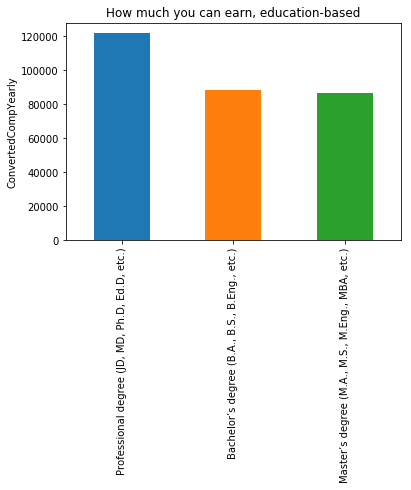

In [12]:
# Display the results graphically
Education_mean.plot(kind='bar', legend=None)
plt.title('How much you can earn, education-based');
plt.xlabel('');
plt.ylabel('ConvertedCompYearly');
plt.show()

In [13]:
# Filter out the countries with less than 20 participants - bad statistics
Education_mean = Education_mean.reset_index()
Education_mean.columns = ['EdLevel','Salary']
Education_mean.head(30)

,EdLevel,Salary
0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",121803.656966
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",88397.473050
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",86419.223549


### Step 3.2: Where do I have to go?

In [14]:
# Create new dataframe, reduced by the countries to countries with high salary
data_red2 = data_red[data_red['EdLevel'].isin(Education_mean['EdLevel'])]
data_red2.head()

,Country,EdLevel,LanguageHaveWorkedWith,ConvertedCompYearly
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",C;C++;Fortran;MATLAB;Python;SQL,30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",JavaScript;Julia;Python;SQL;TypeScript,91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Python,53703.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,161044.0
395,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Bash/Shell (all shells);Go;HTML/CSS;Java;Kotli...,121018.0


In [15]:
# Calculate the average salary per country
Country_mean = data_red2.groupby(["Country"]).mean()
Country_mean = Country_mean['ConvertedCompYearly'].sort_values(ascending=False)

# Show the countries with a median salary of more than 105000 dollars
const_dollar = 125000
Country_mean = Country_mean[Country_mean>const_dollar]

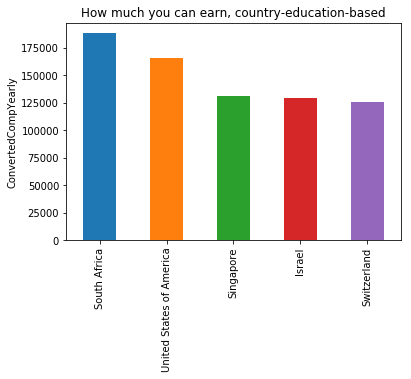

In [16]:
# Display the results graphically
Country_mean.plot(kind='bar', legend=None)
plt.title('How much you can earn, country-education-based');
plt.xlabel('');
plt.ylabel('ConvertedCompYearly');
plt.show()

In [17]:
# Filter out the countries with less than 20 participants - bad statistics
Country_mean = Country_mean.reset_index()
Country_mean.columns = ['Country','Salary']
Country_mean.head(30)

,Country,Salary
0,South Africa,188216.058252
1,United States of America,165681.925401
2,Singapore,131080.244898
3,Israel,129334.125000
4,Switzerland,125568.982578


### Step 3.3: Which programming language should I learn?

In [18]:
# Create new dataframe, reduced by the countries to countries with high salary
data_red3 = data_red2[data_red2['Country'].isin(Country_mean['Country'])]
data_red3.head()

,Country,EdLevel,LanguageHaveWorkedWith,ConvertedCompYearly
428,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);Go;Python;Rust,230000.0
431,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);C#;C++;Go;HTML/CSS;Jav...,85000.0
440,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",C#;HTML/CSS;JavaScript,110000.0
442,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",C#;HTML/CSS;Java;JavaScript;Python,190000.0
456,United States of America,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Bash/Shell (all shells);C;C++;Go,300000.0


In [19]:
# DataFrame mit Dummy-Variablen erstellen
dummies = data_red3['LanguageHaveWorkedWith'].str.get_dummies(sep=';')

# Dummy-Variablen dem originalen DataFrame hinzufügen
data_red4 = pd.concat([data_red3, dummies], axis=1)
data_red4 = data_red4.drop(columns='LanguageHaveWorkedWith')
data_red4.head()

,Country,EdLevel,ConvertedCompYearly,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
428,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",230000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
431,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",85000.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
440,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",110000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
442,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",190000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
456,United States of America,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",300000.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Read out the column names (programming languages)
ProgLanguage = data_red4.columns[3:]

# Convert to List
ProgLanguage_list = ProgLanguage.tolist()

In [21]:
# calculate the percentage of people who know this programming language
ProgLanguage_list_perc = data_red4[ProgLanguage_list].sum() / data_red4.shape[0] * 100
ProgLanguage_list_perc = ProgLanguage_list_perc.sort_values(ascending=False)
print(ProgLanguage_list_perc[ProgLanguage_list_perc>30])

JavaScript                 61.958998
SQL                        56.970387
Python                     56.400911
HTML/CSS                   50.045558
Bash/Shell (all shells)    44.851936
TypeScript                 41.321185
dtype: float64


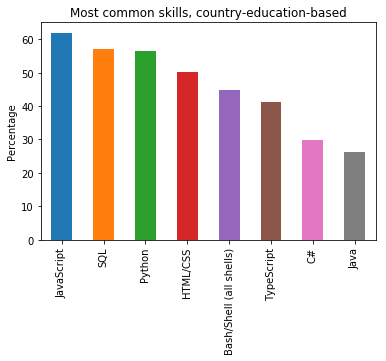

In [22]:
# Display the results graphically
ProgLanguage_list_perc[:8].plot(kind='bar', legend=None)
plt.title('Most common skills, country-education-based');
plt.xlabel('');
plt.ylabel('Percentage');
plt.show()